In [1]:
# Call the relevant python packages
import numpy as np
import pandas as pd
import glob, os                          # Operating system module and pathnames

import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord


# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Output plots in Notebook
#%matplotlib notebook
%matplotlib inline  

# Table setup

In [28]:
# Read in the catalogue

file = 'NGC6822_Spitzer_JHK.csv'
data = ascii.read(file, data_start=1)

#adds criteria columns to table
#inidivual criteria
data['c1a']=0
data['c1b']=0
data['c1c']=0
data['c2a']=0
data['c2b']=0
data['c2c']=0
data['c3a']=0
data['c3b']=0
data['c3c']=0
data['c4a']=0
data['c4b']=0
data['c5a']=0
data['c5b']=0
data['c5c']=0
data['c6a']=0
data['c6b']=0
data['c6c']=0
data['c7']=0
data['c8']=0

#any of the inidividual - e.g. c1a=1, c1b=0, c1c=0 ==> c1=1
data['c1']=0
data['c2']=0
data['c3']=0
data['c4']=0
data['c5']=0
data['c6']=0





#print column names
data.colnames






#define colour and magntitude criteria
err=0.5 #maximum allowed errors for sources to be considered
mod=4.29 #difference in distance moduli between SMC and NGC 6822

def write_column(crit,name):
    print("Number of stars in cut "+name+": {}".format(len(crit[0])))
    for i in range(len(crit[0])):
        #writes '1' to cell where condition is met
        #'0' is the default
        data[name][crit[0][i]]=1
        

        
#CCD/CMD cuts - creates an indexed catalogue of sources meeting the criteria
#sources are only added if their errors are in between 0 and the value <err> defined above
c1a_idx=np.where((data['Hmag']-data['Kmag']<1.1674*(data['Kmag']-data['k45mag'])-0.5240) & (data['eHmag']<err) & (data['eKmag']<err) & (data['e45mag']<err)&(data['eHmag']>0) & (data['eKmag']>0) & (data['e45mag']>0))
write_column(c1a_idx,'c1a')

c1b_idx=np.where((data['Jmag']-data['Kmag']<0.7774*(data['Jmag']-data['k45mag'])-0.4196) & (data['eJmag']<err) & (data['eKmag']<err) & (data['e45mag']<err)&(data['eJmag']>0) & (data['eKmag']>0) & (data['e45mag']>0))
write_column(c1b_idx,'c1b')

c1c_idx=np.where((data['Jmag']-data['Hmag']<1.0758*(data['Hmag']-data['k45mag'])-0.2997) & (data['eJmag']<err) & (data['eHmag']<err) & (data['e45mag']<err)&(data['eJmag']>0) & (data['eHmag']>0) & (data['e45mag']>0))
write_column(c1c_idx,'c1c')

c2a_idx=np.where((data['k36mag']<13.2+mod) & (data['k36mag']-data['k58mag']>=2.1) & (data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']>0) & (data['e58mag']>0))
write_column(c2a_idx,'c2a')

c2b_idx=np.where((11+mod<data['k36mag'])&(data['k36mag']<13.2+mod) & (0.8<=data['k36mag']-data['k58mag'])&(data['k36mag']-data['k58mag']<=2.1) & (data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']>0) & (data['e58mag']>0))
write_column(c2b_idx,'c2b')

c2c_idx=np.where((data['k36mag']>13.2+mod) & (data['k36mag']-data['k58mag']>3.0) & (data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']>0) & (data['e58mag']>0))
write_column(c2c_idx,'c2c')

c3a_idx=np.where((data['k45mag']<=12.5+mod) & (data['k45mag']-data['k58mag']>=1.1) & (data['e45mag']<err) & (data['e58mag']<err)&(data['e45mag']>0) & (data['e58mag']>0))
write_column(c3a_idx,'c3a')

c3b_idx=np.where((data['k45mag']<12.5+mod)&(0.5<data['k45mag']-data['k58mag']) & (data['k45mag']-data['k58mag']<=1.1) & (data['k45mag']>11.33-1.67*(data['k45mag']-data['k58mag'])+mod) & (data['e45mag']<err) & (data['e58mag']<err)&(data['e45mag']>0) & (data['e58mag']>0))
write_column(c3b_idx,'c3b')

c3c_idx=np.where((data['k45mag']>12.5+mod) & (data['k45mag']<7+5*(data['k45mag']-data['k58mag'])+mod) & (data['e45mag']<err) & (data['e58mag']<err)&(data['e45mag']>0) & (data['e58mag']>0))
write_column(c3c_idx,'c3c')

c4a_idx=np.where((data['k80mag']<10.7+mod) & (data['k45mag']-data['k80mag']>2.0) & (data['e45mag']<err) & (data['e80mag']<err)&(data['e45mag']>0) & (data['e80mag']>0))
write_column(c4a_idx,'c4a')

c4b_idx=np.where((1.0<data['k45mag']-data['k80mag']) & (data['k45mag']-data['k80mag']<=2.0) & (data['k80mag']<12.7-(data['k45mag']-data['k80mag'])+mod) & (data['k80mag']>11.3-1.8*(data['k45mag']-data['k80mag'])+mod) & (data['e45mag']<err) & (data['e80mag']<err)&(data['e45mag']>0) & (data['e80mag']>0))
write_column(c4b_idx,'c4b')

c5a_idx=np.where((data['k45mag']<=12.2+mod) & (data['k45mag']-data['k24mag']>=4.0) & (data['e45mag']<err) & (data['e24mag']<err)&(data['e45mag']>0) & (data['e24mag']>0))
write_column(c5a_idx,'c5a')

c5b_idx=np.where((data['k45mag']<12.2+mod) & (3.2<data['k45mag']-data['k24mag']) & (data['k45mag']-data['k24mag']<=4.0) & (data['k45mag']>15-1.25*(data['k45mag']-data['k24mag'])) & (data['e45mag']<err) & (data['e24mag']<err)&(data['e45mag']>0) & (data['e24mag']>0))
write_column(c5b_idx,'c5b')

c5c_idx=np.where((data['k45mag']>12.5+mod) & (data['k45mag']<6.43+1.03*(data['k45mag']-data['k24mag'])+mod) & (data['e45mag']<err) & (data['e24mag']<err)&(data['e45mag']>0) & (data['e24mag']>0))
write_column(c5c_idx,'c5c')

c6a_idx=np.where((data['k80mag']<10+mod) & (data['k80mag']-data['k24mag']>=2.7) & (data['e80mag']<err) & (data['e24mag']<err)&(data['e80mag']>0) & (data['e24mag']>0))
write_column(c6a_idx,'c6a')

c6b_idx=np.where((data['k80mag']<10+mod) & (data['k80mag']-data['k24mag']<=2.7) & (data['k80mag']>12.5-1.67*(data['k80mag']-data['k24mag'])+mod) & (data['e80mag']<err) & (data['e24mag']<err)&(data['e80mag']>0) & (data['e24mag']>0))
write_column(c6b_idx,'c6b')

c6c_idx=np.where((data['k80mag']>=10+mod) & (data['k80mag']<5.27+1.09*(data['k80mag']-data['k24mag'])+mod) & (data['e80mag']<err) & (data['e24mag']<err)&(data['e80mag']>0) & (data['e24mag']>0))
write_column(c6c_idx,'c6c')

#note | symbol is equivalent to <or>
c7_idx=np.where((data['k36mag']-data['k45mag']>=0.2) & ((data['k36mag']<=13.3)|(data['k36mag']<=8.7+4*(data['k36mag']-data['k45mag'])+mod)) & (data['e36mag']<err) & (data['e45mag']<err)&(data['e36mag']>0) & (data['e45mag']>0))
write_column(c7_idx,'c7')

c8_idx=np.where((data['Hmag']-data['Kmag']>0.0) & (data['Hmag']-data['Kmag']>0.9-1.7*(data['k36mag']-data['k45mag'])) & (data['Hmag']-data['Kmag']<-0.85+3.44*(data['k36mag']-data['k45mag'])) & (data['e36mag']<err) & (data['e45mag']<err) & (data['eHmag']<err) & (data['eKmag']<err)&(data['e36mag']>0) & (data['e45mag']>0) & (data['eHmag']>0) & (data['eKmag']>0))
write_column(c8_idx,'c8')


#add columns of the inidvidual conditions together
#entries in this column are the number of these conditions met
data['c1']=data['c1a']+data['c1b']+data['c1c']
data['c2']=data['c2a']+data['c2b']+data['c3c']
data['c3']=data['c3a']+data['c3b']+data['c3c']
data['c4']=data['c4a']+data['c4b']
data['c5']=data['c5a']+data['c5b']+data['c5c']
data['c6']=data['c6a']+data['c6b']+data['c6c']

#create indices for any sources that meet the numbered conditions
c1_idx=np.where(data['c1']>0)
c2_idx=np.where(data['c2']>0)
c3_idx=np.where(data['c3']>0)
c4_idx=np.where(data['c4']>0)
c5_idx=np.where(data['c5']>0)
c6_idx=np.where(data['c6']>0)

Number of stars in cut c1a: 1890
Number of stars in cut c1b: 632
Number of stars in cut c1c: 1519
Number of stars in cut c2a: 88
Number of stars in cut c2b: 1355
Number of stars in cut c2c: 90
Number of stars in cut c3a: 111
Number of stars in cut c3b: 711
Number of stars in cut c3c: 4359
Number of stars in cut c4a: 567
Number of stars in cut c4b: 848
Number of stars in cut c5a: 849
Number of stars in cut c5b: 324
Number of stars in cut c5c: 814
Number of stars in cut c6a: 355
Number of stars in cut c6b: 85
Number of stars in cut c6c: 326
Number of stars in cut c7: 222
Number of stars in cut c8: 221


In [20]:
#print column names
data.colnames

['ID',
 'RA',
 'Dec',
 'k36mag',
 'e36mag',
 'd36mag',
 'k45mag',
 'e45mag',
 'd45mag',
 'k58mag',
 'e58mag',
 'd58mag',
 'k80mag',
 'e80mag',
 'd80mag',
 'k24mag',
 'e24mag',
 'dstArcSec',
 'RAJ2000',
 'DEJ2000',
 'Jmag',
 'eJmag',
 'Hmag',
 'eHmag',
 'Kmag',
 'eKmag',
 'c1a',
 'c1b',
 'c1c',
 'c2a',
 'c2b',
 'c2c',
 'c3a',
 'c3b',
 'c3c',
 'c4a',
 'c4b',
 'c5a',
 'c5b',
 'c5c',
 'c6a',
 'c6b',
 'c6c',
 'c7',
 'c8',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c6']

Note null values in the IRAC and MIPS data are given as -9999.0

Nulll values in the JHK section were given as null initially.

These have been made consistent with each other to make life easier later on.


In [27]:
# If you want to examine the catalogue in browser
data.show_in_browser(jsviewer=True)


In [34]:
# Select sources that have MIPS [24] data & Also mask out sources with large errors ie >0.2
MIPS24_idx = ((data['k24mag'] > 0) & (data['e24mag'] < 0.2) & (data['e24mag'] > 0.0)) 
MIPS24_cat = data[MIPS24_idx]

CMD36_idx = ((data['k36mag'] > 0) & (data['e36mag'] < 0.2) & (data['e36mag'] > 0.0)) 
CMD36_cat = data[CMD36_idx]

CMD45_idx = ((data['k45mag'] > 0) & (data['e45mag'] < 0.2) & (data['e45mag'] > 0.0)) 
CMD45_cat = data[CMD45_idx]

CMD58_idx = ((data['k58mag'] > 0) & (data['e58mag'] < 0.2) & (data['e58mag'] > 0.0)) 
CMD58_cat = data[CMD58_idx]

CMD80_idx = ((data['k80mag'] > 0) & (data['e80mag'] < 0.2) & (data['e80mag'] > 0.0)) 
CMD80_cat = data[CMD80_idx]

CCDH_idx = ((data['Hmag'] > 0) & (data['eHmag'] < 0.2) & (data['eHmag'] > 0.0)) 
CCDH_cat = data[CCDH_idx]

CCDJ_idx = ((data['Jmag'] > 0) & (data['eJmag'] < 0.2) & (data['eJmag'] > 0.0)) 
CCDJ_cat = data[CCDJ_idx]

CCDK_idx = ((data['Kmag'] > 0) & (data['eKmag'] < 0.2) & (data['eKmag'] > 0.0)) 
CCDK_cat = data[CCDK_idx]

# Example doing a colour cut  - np.where() is excelent for this it returns the index which makes this criteria

#CMD cuts
idx_ysoish_3658 = np.where((data['k36mag']-data['k58mag'] >= 2.1) & (data['k36mag'] < 13.2+mod))
# print the number selected
print("Number of stars in cut 3658: {}".format(len(idx_ysoish_3658[0])))

idx_ysoish_4558 = np.where((data['k45mag']-data['k58mag'] >=1.1) & (data['k45mag'] <=12.5+mod))
print("Number of stars in cut 4558: {}".format(len(idx_ysoish_4558[0])))

idx_ysoish_4580 = np.where((data['k45mag']-data['k80mag'] > 2.0) & (data['k80mag'] < 10.7+mod))
print("Number of stars in cut 4580: {}".format(len(idx_ysoish_4580[0])))

idx_ysoish_4524 = np.where((data['k45mag']-data['k24mag'] >= 4.0) & (data['k45mag'] <= 12.2+mod))
print("Number of stars in cut 4524: {}".format(len(idx_ysoish_4524[0])))

idx_ysoish_8024 = np.where((data['k80mag']-data['k24mag'] >= 2.7) & (data['k80mag'] < 10+mod))
print("Number of stars in cut 8024: {}".format(len(idx_ysoish_8024[0])))

idx_ysoish_3645= np.where((data['k36mag']-data['k45mag'] > 1.7) & (data['k36mag'] < 25.))
print("Number of stars in cut 3645: {}".format(len(idx_ysoish_3645[0])))


#CCD cuts
idx_ysoish_HKK45= np.where((data['Hmag']-data['Kmag'] > 1.1674*(data['Kmag']-data['k45mag'])-0.5240))
print("Number of stars in cut HKK45: {}".format(len(idx_ysoish_HKK45[0])))

idx_ysoish_JKJ45= np.where((data['Jmag']-data['Kmag'] > 1.7) & (data['Jmag']-data['k45mag'] < 25.))
print("Number of stars in cut JKJ45: {}".format(len(idx_ysoish_JKJ45[0])))

idx_ysoish_JHH45= np.where((data['Jmag']-data['Hmag'] > 1.7) & (data['Hmag']-data['k45mag'] < 25.))
print("Number of stars in cut JHH45: {}".format(len(idx_ysoish_JHH45[0])))

idx_ysoish_36455880= np.where((data['k36mag']-data['k45mag'] > 1.7) & (data['k58mag']-data['k80mag'] < 25.))
print("Number of stars in cut 36455880: {}".format(len(idx_ysoish_36455880[0])))

idx_ysoish_K363645= np.where((data['Kmag']-data['k36mag'] > 1.7) & (data['k36mag']-data['k45mag'] < 25.))
print("Number of stars in cut K363645: {}".format(len(idx_ysoish_K363645[0])))

# CMDs

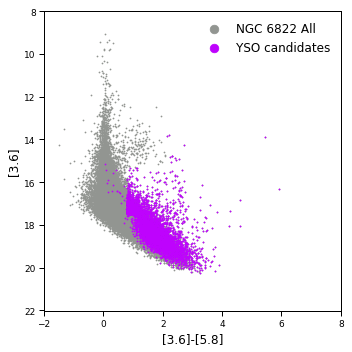

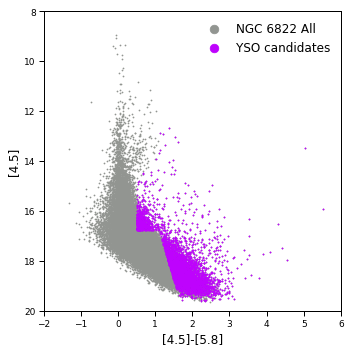

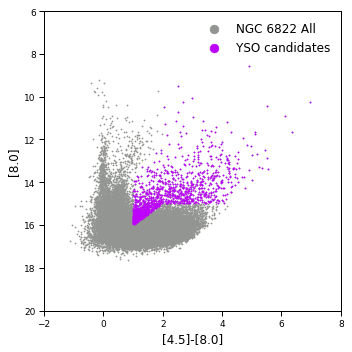

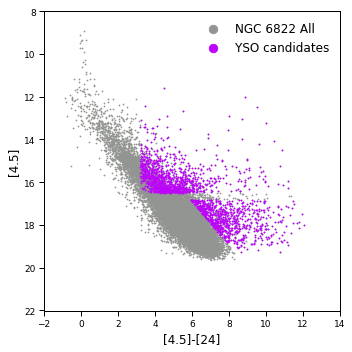

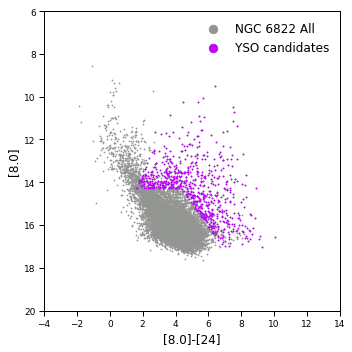

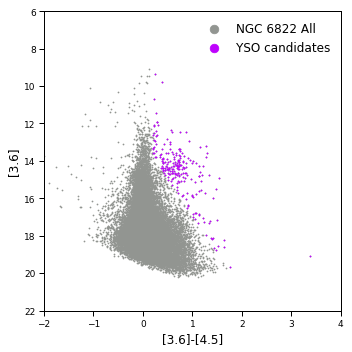

In [32]:
#3658
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k36mag']-data['k58mag'], data['k36mag'], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k36mag'][c2_idx]-data['k58mag'][c2_idx], data['k36mag'][c2_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
#plt.scatter(data['k36mag'][MIPS24_idx]-data['k58mag'][MIPS24_idx], data['k36mag'][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] source")

# Set limits if automatic values dont work well
plt.xlim(-2,8)      # Set the x-axis limits
plt.ylim(22,8)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[3.6]-[5.8]", fontsize=12)
plt.ylabel("[3.6]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()








# 4558
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k45mag']-data['k58mag'], data['k45mag'], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k45mag'][c3_idx]-data['k58mag'][c3_idx], data['k45mag'][c3_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
#plt.scatter(data['k45mag'][MIPS24_idx]-data['k58mag'][MIPS24_idx], data['k45mag'][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] source")

# Set limits if automatic values dont work well
plt.xlim(-2,6)      # Set the x-axis limits
plt.ylim(20,8)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[4.5]-[5.8]", fontsize=12)
plt.ylabel("[4.5]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()






# 4580
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k45mag']-data['k80mag'], data['k80mag'], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k45mag'][c4_idx]-data['k80mag'][c4_idx], data['k80mag'][c4_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
#plt.scatter(data['k45mag'][MIPS24_idx]-data['k80mag'][MIPS24_idx], data['k80mag'][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] source")

# Set limits if automatic values dont work well
plt.xlim(-2,8)      # Set the x-axis limits
plt.ylim(20,6)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[4.5]-[8.0]", fontsize=12)
plt.ylabel("[8.0]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()








# 4524
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k45mag']-data['k24mag'], data['k45mag'], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k45mag'][c5_idx]-data['k24mag'][c5_idx], data['k45mag'][c5_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
#plt.scatter(data['k45mag'][MIPS24_idx]-data['k24mag'][MIPS24_idx], data['k45mag'][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24 source]")

# Set limits if automatic values dont work well
plt.xlim(-2,14)      # Set the x-axis limits
plt.ylim(22,8)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[4.5]-[24]", fontsize=12)
plt.ylabel("[4.5]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()






# 8024
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k80mag']-data['k24mag'], data['k80mag'], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k80mag'][c6_idx]-data['k24mag'][c6_idx], data['k80mag'][c6_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
#plt.scatter(data['k80mag'][MIPS24_idx]-data['k24mag'][MIPS24_idx], data['k80mag'][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] source")

# Set limits if automatic values dont work well
plt.xlim(-4,14)      # Set the x-axis limits
plt.ylim(20,6)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[8.0]-[24]", fontsize=12)
plt.ylabel("[8.0]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()






# 3645
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k36mag']-data['k45mag'], data['k36mag'], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k36mag'][c7_idx]-data['k45mag'][c7_idx], data['k36mag'][c7_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
#plt.scatter(data['k36mag'][MIPS24_idx]-data['k45mag'][MIPS24_idx], data['k36mag'][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] source")

# Set limits if automatic values dont work well
plt.xlim(-2,4)      # Set the x-axis limits
plt.ylim(22,6)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[3.6]-[4.5]", fontsize=12)
plt.ylabel("[3.6]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()

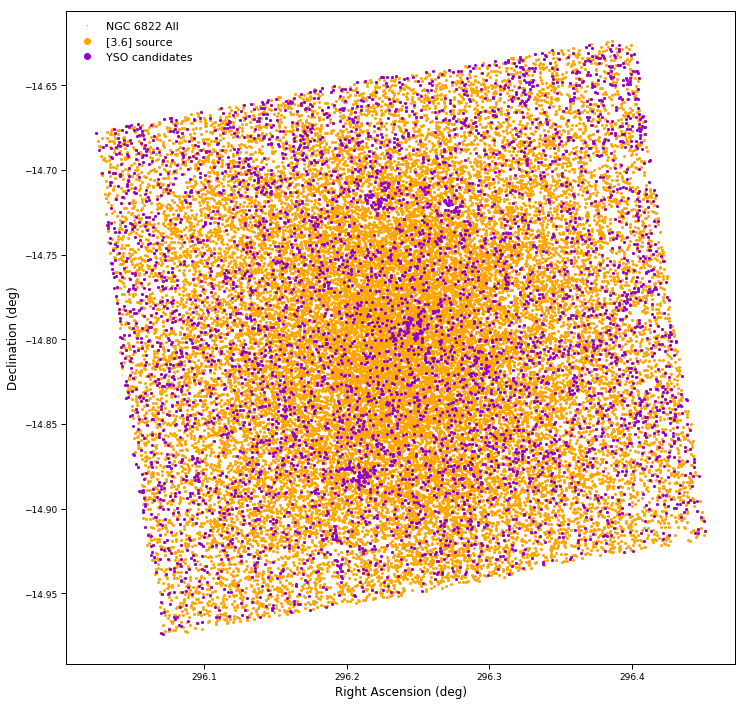

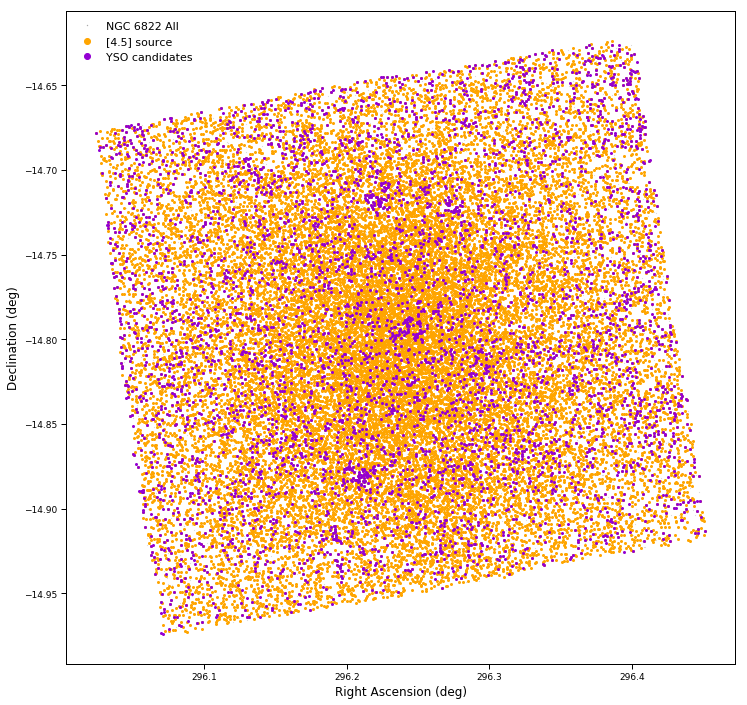

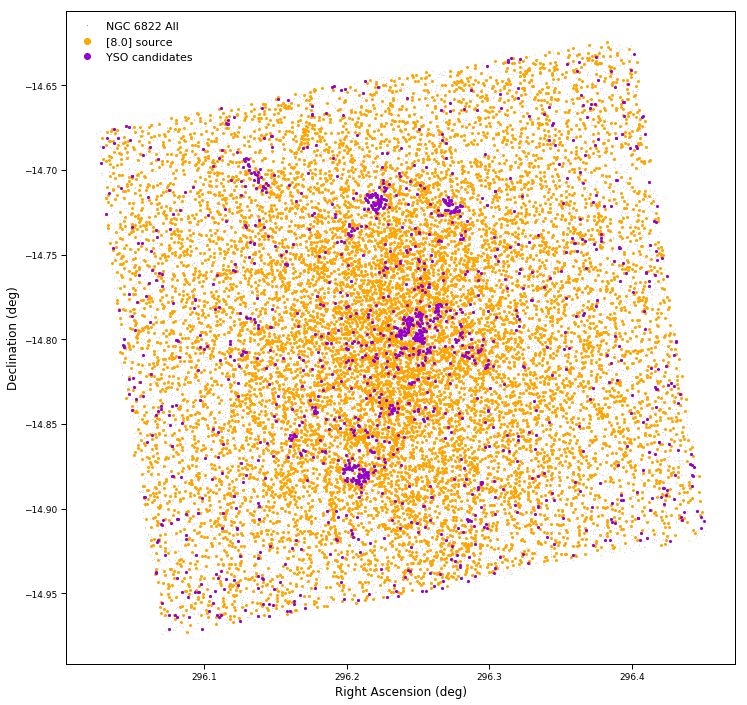

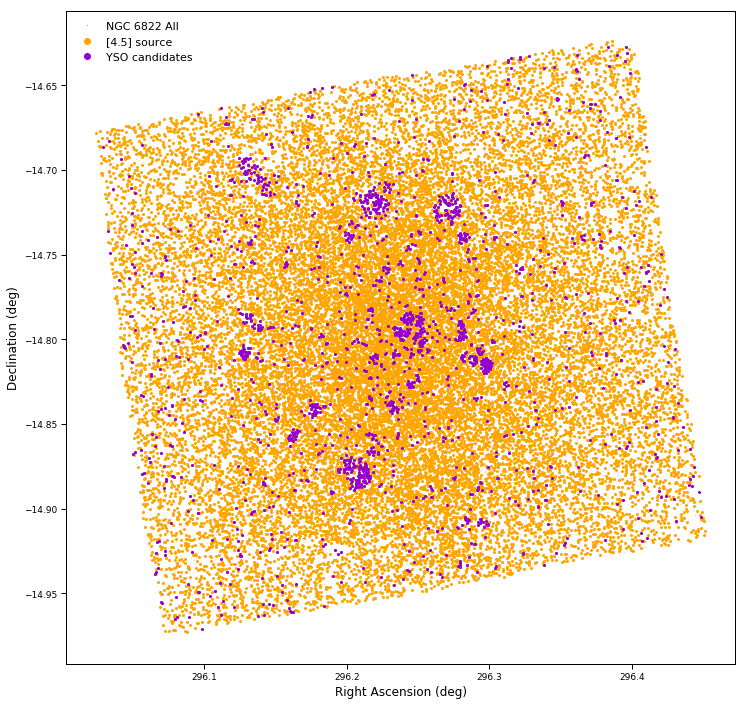

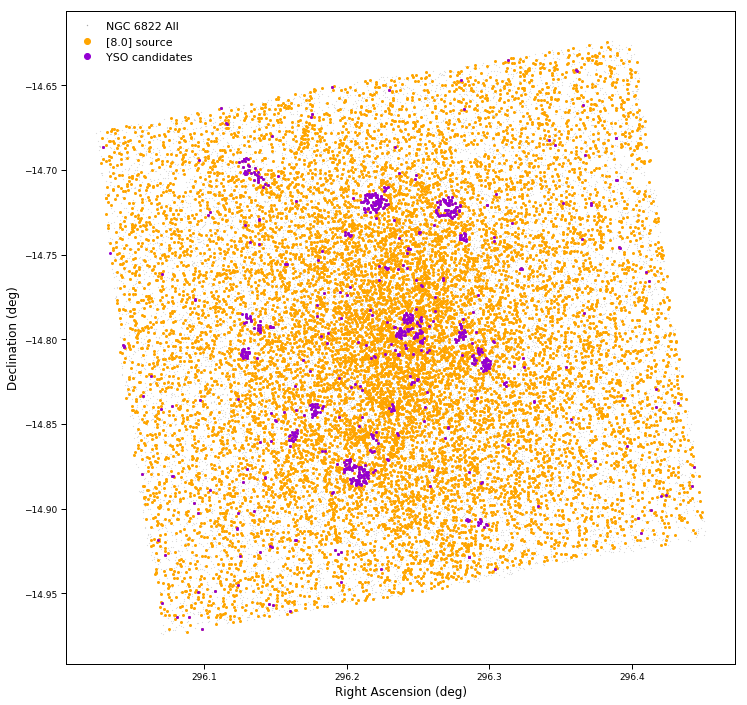

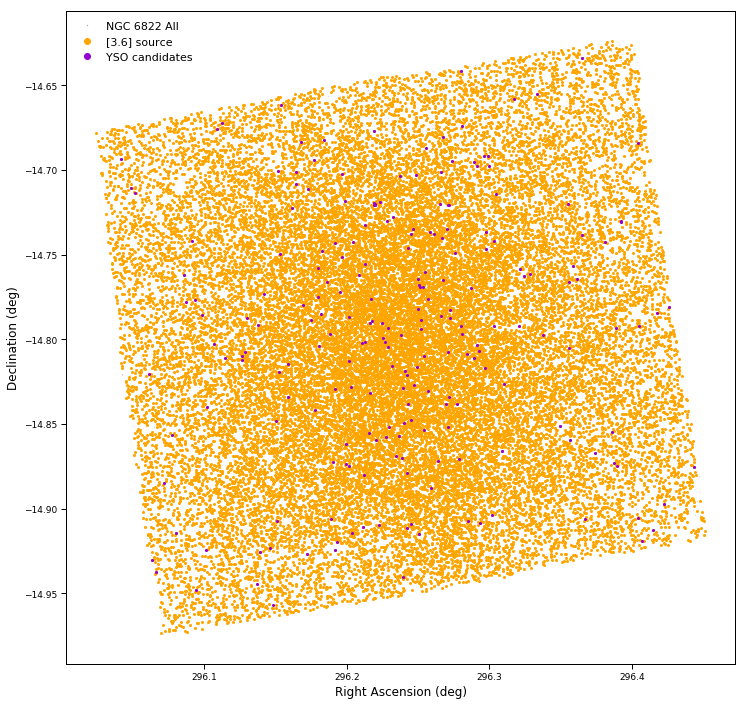

In [35]:
# 3658
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [3.6] data
plt.plot(data['RA'][CMD36_idx], data['Dec'][CMD36_idx], '.', color='orange', ms=4, label="[3.6] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][c2_idx], data['Dec'][c2_idx], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()






# 4558
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [4.5] data
plt.plot(data['RA'][CMD45_idx], data['Dec'][CMD45_idx], '.', color='orange', ms=4, label="[4.5] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][c3_idx], data['Dec'][c3_idx], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()







# 4580
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [8.0] data
plt.plot(data['RA'][CMD80_idx], data['Dec'][CMD80_idx], '.', color='orange', ms=4, label="[8.0] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][c4_idx], data['Dec'][c4_idx], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()







# 4524
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [8.0] data
plt.plot(data['RA'][CMD45_idx], data['Dec'][CMD45_idx], '.', color='orange', ms=4, label="[4.5] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][c5_idx], data['Dec'][c5_idx], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()







# 8024
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [8.0] data
plt.plot(data['RA'][CMD80_idx], data['Dec'][CMD80_idx], '.', color='orange', ms=4, label="[8.0] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][c6_idx], data['Dec'][c6_idx], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()





# 3645
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [3.6] data
plt.plot(data['RA'][CMD36_idx], data['Dec'][CMD36_idx], '.', color='orange', ms=4, label="[3.6] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][c7_idx], data['Dec'][c7_idx], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()

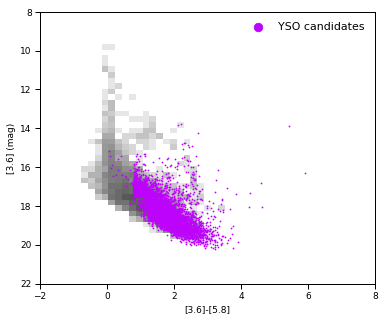

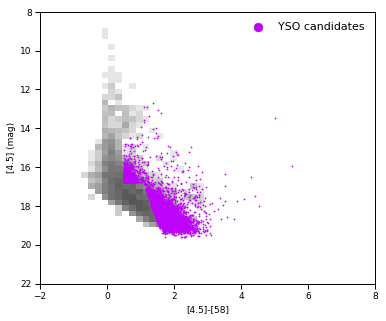

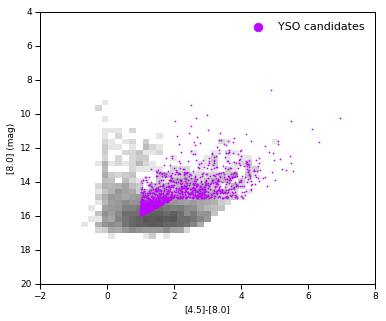

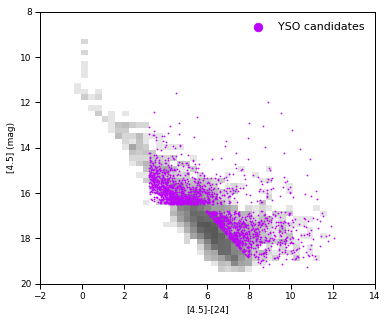

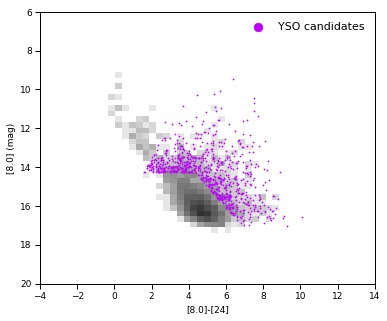

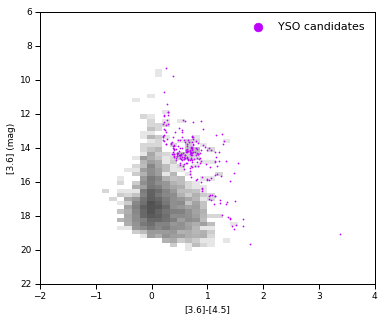

In [37]:
# Hess diagrams



#3658
#Defining the magnitude and color
color = MIPS24_cat['k36mag']-MIPS24_cat['k58mag'] 
mag2= MIPS24_cat['k36mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 50) #(min, max, nbins)
magedges = np.linspace(8, 22, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[22,8],
         xlabel='[3.6]-[5.8]',
         ylabel='[3.6] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k36mag'][c2_idx]-data['k58mag'][c2_idx], data['k36mag'][c2_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)


#4558
#Defining the magnitude and color
color = MIPS24_cat['k45mag']-MIPS24_cat['k58mag'] 
mag2= MIPS24_cat['k45mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 50) #(min, max, nbins)
magedges = np.linspace(8, 22, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[22,8],
         xlabel='[4.5]-[58]',
         ylabel='[4.5] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k45mag'][c3_idx]-data['k58mag'][c3_idx], data['k45mag'][c3_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)



#4580
#Defining the magnitude and color
color = MIPS24_cat['k45mag']-MIPS24_cat['k80mag'] 
mag2= MIPS24_cat['k80mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 50) #(min, max, nbins)
magedges = np.linspace(4, 20, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[20,4],
         xlabel='[4.5]-[8.0]',
         ylabel='[8.0] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k45mag'][c4_idx]-data['k80mag'][c4_idx], data['k80mag'][c4_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)



#4524
#Defining the magnitude and color
color = MIPS24_cat['k45mag']-MIPS24_cat['k24mag'] 
mag2= MIPS24_cat['k45mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 14, 50) #(min, max, nbins)
magedges = np.linspace(8, 20, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,14],
         ylim=[20,8],
         xlabel='[4.5]-[24]',
         ylabel='[4.5] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k45mag'][c5_idx]-data['k24mag'][c5_idx], data['k45mag'][c5_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)


#8024
#Defining the magnitude and color
color = MIPS24_cat['k80mag']-MIPS24_cat['k24mag'] 
mag2= MIPS24_cat['k80mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-4, 14, 50) #(min, max, nbins)
magedges = np.linspace(6, 20, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-4,14],
         ylim=[20,6],
         xlabel='[8.0]-[24]',
         ylabel='[8.0] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k80mag'][c6_idx]-data['k24mag'][c6_idx], data['k80mag'][c6_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)



#3645
#Defining the magnitude and color
color = MIPS24_cat['k36mag']-MIPS24_cat['k45mag'] 
mag2= MIPS24_cat['k36mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-4.0, 6, 75) #(min, max, nbins)
magedges = np.linspace(6, 24, 75)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,4],
         ylim=[22,6],
         xlabel='[3.6]-[4.5]',
         ylabel='[3.6] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k36mag'][c7_idx]-data['k45mag'][c7_idx], data['k36mag'][c7_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

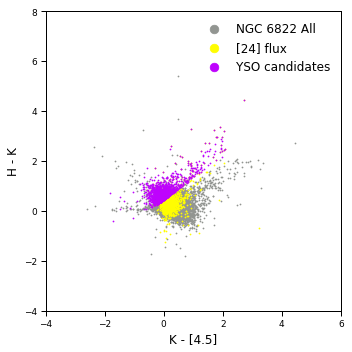

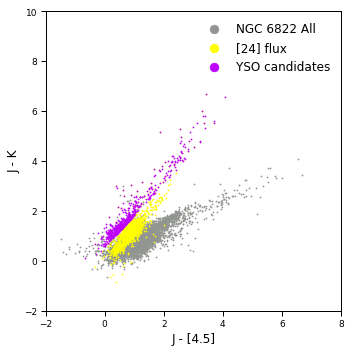

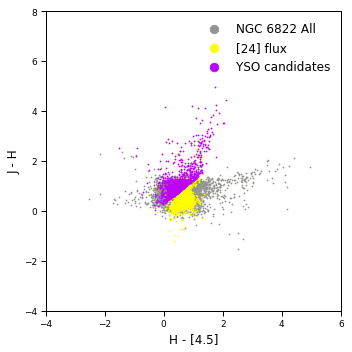

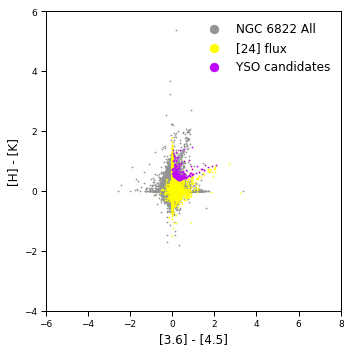

In [38]:
#CCDs


def ccd(A,B,C,D,idx,a,b,c,d,xlimits=[0,0],ylimits=[0,0]):
    # Setting up plotting sizes
    plt.rc('font', family='sans-serif')
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=9)
    plt.rc("ytick", labelsize=9)
    plt.rc("axes", labelsize=9)
    plt.rc("legend", fontsize=12)
    # plt.rcdefaults() # Resets the parameters to their default values

    # Setting up figure
    fig = plt.figure(figsize=(5, 5))
    ax = plt.gca()  # Sets up active plot region

    # Plot everything
    plt.scatter(data[C]-data[D], data[A]-data[B], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

    # Plot only stars which satify the example cut criteria
    plt.scatter(data[A][MIPS24_idx]-data[B][MIPS24_idx], data[C][MIPS24_idx]-data[D][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] flux")
    plt.scatter(data[A][idx]-data[B][idx], data[C][idx]-data[D][idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    
    # Set limits if automatic values dont work well
    #plt.xlim(-4,8)      # Set the x-axis limits
    #plt.ylim(-15,15)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    # Change the xlimits of a plot
    if xlimits[0] !=  xlimits[1]:
            plt.xlim(xlimits[0],xlimits[1])

    # Change the ylimits of a plot
    if ylimits[0] !=  ylimits[1]:
            plt.ylim(ylimits[0],ylimits[1])
    
    # Set the axis lables
    x_label = c+' - '+d
    y_label = a+' - '+b
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Add a legend
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

    fig.tight_layout()
    #plt.savefig("bla.pdf", bbox_inches='tight')
    plt.show()
    plt.close()
    
    
ccd('Hmag','Kmag','Kmag','k45mag',c1a_idx,'H','K','K','[4.5]',[-4,6],[-4,8])
ccd('Jmag','Kmag','Jmag','k45mag',c1b_idx,'J','K','J','[4.5]',[-2,8],[-2,10])
ccd('Jmag','Hmag','Hmag','k45mag',c1c_idx,'J','H','H','[4.5]',[-4,6],[-4,8])
#ccd('k36mag','k45mag','k58mag','k80mag',idx_ysoish_36455880,'[3.6]','[4.5]','[5.8]','[8.0]',[-6,8],[-4,6])
#ccd('Kmag','k36mag','k36mag','k45mag',idx_ysoish_K363645,'K','[3.6]','[3.6]','[4.5]',[-4,4],[-4,6])
ccd('Hmag','Kmag','k36mag','k45mag',c8_idx,'[H]','[K]','[3.6]','[4.5]',[-6,8],[-4,6])